# EDA 3: Práce s jednou proměnnou, rozdělení

* Chyby v proměnných, parsování, …
* Missing values (fillna, dropna)
* Časové proměnné
* Resampling
* Práce s časovými zónami
* Základy statistiky
  - Median vs. mean, kvantily
  - Describe
* Rozdělení
  - CDF & PDF
  - Value_counts
  - Histogramy, box plot (violin, KDE)
* Jako data použít časové řady, ukázat něco ze spurious correlations




In [27]:
%load_ext lab_black

In [1]:
import pandas as pd
import numpy as np

In [91]:
%matplotlib inline

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

## Teplota

In [40]:
weather_ruzyne = pd.read_csv("počasí_ruzyně.csv")

In [41]:
weather_ruzyne

rok  měsíc  den  teplota průměrná  teplota maximální  \
0      1961      1    1              -2.0                1.0   
1      1961      1    2              -1.9               -1.2   
2      1961      1    3               0.1                1.0   
3      1961      1    4              -0.3                2.1   
4      1961      1    5               0.4                2.8   
...     ...    ...  ...               ...                ...   
21571  2018     12   27               4.0                6.5   
21572  2018     12   28               3.9                6.2   
21573  2018     12   29               2.2                4.8   
21574  2018     12   30               4.1                5.8   
21575  2018     12   31               3.7                5.4   

       teplota minimální  rychlost větru  tlak vzduchu  vlhkost vzduchu  \
0                   -3.4             1.7         969.9             87.0   
1                   -2.4             3.0         965.2             89.0   
2                   -2.6             2.7         952.3             80.0   
3                   -2.0             3.3         953.6             87.0   
4                   -4.3             6.3         963.9             81.0   
...                  ...             ...           ...              ...   
21571                2.7             5.4         981.4             88.0   
21572                0.3             3.9         981.5             82.0   
21573                1.3             5.8         983.8             87.0   
21574                1.0             7.9         980.0             82.0   
21575                1.2             3.2         986.2             85.0   

       úhrn srážek  celková výška sněhu  sluneční svit  
0              0.0                  6.0            0.4  
1              0.0                  4.0            0.0  
2              0.0                  3.0            0.0  
3              0.0                  3.0            1.0  
4              0.0                  2.0            2.2  
...            ...                  ...            ...  
21571          0.0                  0.0            0.5  
21572          0.0                  0.0            3.9  
21573          0.8                  0.0            0.5  
21574          0.5                  0.0            0.5  
21575          0.0                  0.0            0.0  

[21576 rows x 12 columns]

Problém 1: Rok, měsíc, den odděleně

In [63]:
pd.to_datetime(pd.DataFrame({"year": [2015, 2016], "month": [2, 3], "day": [4, 5]}))

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [65]:
datum = pd.to_datetime(
        weather_ruzyne[["rok", "měsíc", "den"]].rename(
            columns={"rok": "year", "měsíc": "month", "den": "day"}
        ),
    )

ValueError: cannot assemble the datetimes: day is out of range for month

In [66]:
datum = pd.to_datetime(
    weather_ruzyne[["rok", "měsíc", "den"]].rename(
        columns={"rok": "year", "měsíc": "month", "den": "day"}
    ),
    errors="coerce",
)

In [67]:
datum

0       1961-01-01
1       1961-01-02
2       1961-01-03
3       1961-01-04
4       1961-01-05
           ...    
21571   2018-12-27
21572   2018-12-28
21573   2018-12-29
21574   2018-12-30
21575   2018-12-31
Length: 21576, dtype: datetime64[ns]

In [68]:
weather_ruzyne["datum"] = datum

Problém 2: Různé počty (`count`) u sloupců s hodnotami - `NaN` 

In [69]:
weather_ruzyne.count()

rok                    21576
měsíc                  21576
den                    21576
teplota průměrná       21182
teplota maximální      21183
teplota minimální      21181
rychlost větru         21184
tlak vzduchu           21184
vlhkost vzduchu        21184
úhrn srážek            21184
celková výška sněhu    21184
sluneční svit          21184
datum                  21184
dtype: int64

In [70]:
weather_ruzyne.isna().sum()

rok                      0
měsíc                    0
den                      0
teplota průměrná       394
teplota maximální      393
teplota minimální      395
rychlost větru         392
tlak vzduchu           392
vlhkost vzduchu        392
úhrn srážek            392
celková výška sněhu    392
sluneční svit          392
datum                  392
dtype: int64

Otázka: Co vrátí `weather_ruzyne.isna().count()`?

Jak funguje `dropna`

In [60]:
pd.Series([1, 2, np.nan, 4, 5]).dropna()

0    1.0
1    2.0
3    4.0
4    5.0
dtype: float64

In [55]:
weather_ruzyne.dropna().count()

rok                    21178
měsíc                  21178
den                    21178
teplota průměrná       21178
teplota maximální      21178
teplota minimální      21178
rychlost větru         21178
tlak vzduchu           21178
vlhkost vzduchu        21178
úhrn srážek            21178
celková výška sněhu    21178
sluneční svit          21178
datum                  21178
dtype: int64

Pozor: `dropna` odstranilo i moc řádek navíc, správných datumů je 21184! Řešením je `dropna(subset=["datum"])`

In [72]:
weather_ruzyne.dropna(subset=["datum"]).count()

rok                    21184
měsíc                  21184
den                    21184
teplota průměrná       21182
teplota maximální      21183
teplota minimální      21181
rychlost větru         21184
tlak vzduchu           21184
vlhkost vzduchu        21184
úhrn srážek            21184
celková výška sněhu    21184
sluneční svit          21184
datum                  21184
dtype: int64

Problém: Ještě zbývají nějaké nedefinované hodnoty. Místo smazání je můžeme vhodně doplnit, např. nejbližší hodnotou.

In [73]:
pd.Series([1, 2, np.nan, 4, 5]).fillna(method="ffill")

0    1.0
1    2.0
2    2.0
3    4.0
4    5.0
dtype: float64

In [78]:
weather_ruzyne.dropna(subset=["datum"]).fillna(method="ffill").count()

rok                    21184
měsíc                  21184
den                    21184
teplota průměrná       21184
teplota maximální      21184
teplota minimální      21184
rychlost větru         21184
tlak vzduchu           21184
vlhkost vzduchu        21184
úhrn srážek            21184
celková výška sněhu    21184
sluneční svit          21184
datum                  21184
dtype: int64

Vše dohromady - pipeline :)

In [84]:
ruzyne_opravena = (
    weather_ruzyne.assign(
        datum=pd.to_datetime(
            weather_ruzyne[["rok", "měsíc", "den"]].rename(
                columns={"rok": "year", "měsíc": "month", "den": "day"}
            ),
            errors="coerce",
        )
    )
    .dropna(subset=["datum"])
    .fillna(method="ffill")
    .set_index("datum")
)

In [83]:
ruzyne_opravena

teplota průměrná  teplota maximální  teplota minimální  \
datum                                                                
1961-01-01              -2.0                1.0               -3.4   
1961-01-02              -1.9               -1.2               -2.4   
1961-01-03               0.1                1.0               -2.6   
1961-01-04              -0.3                2.1               -2.0   
1961-01-05               0.4                2.8               -4.3   
...                      ...                ...                ...   
2018-12-27               4.0                6.5                2.7   
2018-12-28               3.9                6.2                0.3   
2018-12-29               2.2                4.8                1.3   
2018-12-30               4.1                5.8                1.0   
2018-12-31               3.7                5.4                1.2   

            rychlost větru  tlak vzduchu  vlhkost vzduchu  úhrn srážek  \
datum                                                                    
1961-01-01             1.7         969.9             87.0          0.0   
1961-01-02             3.0         965.2             89.0          0.0   
1961-01-03             2.7         952.3             80.0          0.0   
1961-01-04             3.3         953.6             87.0          0.0   
1961-01-05             6.3         963.9             81.0          0.0   
...                    ...           ...              ...          ...   
2018-12-27             5.4         981.4             88.0          0.0   
2018-12-28             3.9         981.5             82.0          0.0   
2018-12-29             5.8         983.8             87.0          0.8   
2018-12-30             7.9         980.0             82.0          0.5   
2018-12-31             3.2         986.2             85.0          0.0   

            celková výška sněhu  sluneční svit  
datum                                           
1961-01-01                  6.0            0.4  
1961-01-02                  4.0            0.0  
1961-01-03                  3.0            0.0  
1961-01-04                  3.0            1.0  
1961-01-05                  2.0            2.2  
...                         ...            ...  
2018-12-27                  0.0            0.5  
2018-12-28                  0.0            3.9  
2018-12-29                  0.0            0.5  
2018-12-30                  0.0            0.5  
2018-12-31                  0.0            0.0  

[21184 rows x 9 columns]

## Trochu statistiky - jen základní

In [85]:
ruzyne_opravena.describe()

rok         měsíc           den  teplota průměrná  \
count  21184.000000  21184.000000  21184.000000      21184.000000   
mean    1989.500330      6.523036     15.729324          8.417971   
std       16.740669      3.448755      8.800167          8.184514   
min     1961.000000      1.000000      1.000000        -22.600000   
25%     1975.000000      4.000000      8.000000          2.100000   
50%     1989.500000      7.000000     16.000000          8.700000   
75%     2004.000000     10.000000     23.000000         14.900000   
max     2018.000000     12.000000     31.000000         29.500000   

       teplota maximální  teplota minimální  rychlost větru  tlak vzduchu  \
count       21184.000000       21184.000000    21184.000000  21184.000000   
mean           12.970091           4.078866        4.179343    972.431085   
std             9.472725           7.223835        2.234592      8.062309   
min           -18.300000         -25.500000        0.000000    928.700000   
25%             5.200000          -0.700000        2.700000    967.600000   
50%            13.300000           4.400000        3.700000    972.800000   
75%            20.500000           9.900000        5.300000    977.600000   
max            37.400000          20.700000       20.300000    998.700000   

       vlhkost vzduchu   úhrn srážek  celková výška sněhu  sluneční svit  
count     21184.000000  21184.000000         21184.000000   21184.000000  
mean         76.577747      1.399901             1.052020       4.728998  
std          12.406828      3.832025             3.746289       4.271356  
min          29.000000      0.000000             0.000000       0.000000  
25%          68.000000      0.000000             0.000000       0.500000  
50%          78.000000      0.000000             0.000000       3.900000  
75%          86.000000      1.000000             0.000000       8.100000  
max         100.000000     93.300000            57.000000      15.700000

Průměrné hodnoty v prosinci 2018

In [89]:
ruzyne_opravena[
    (ruzyne_opravena["rok"] == 2018) & (ruzyne_opravena["měsíc"] == 12)
].describe()

rok  měsíc        den  teplota průměrná  teplota maximální  \
count    31.0   31.0  31.000000         31.000000          31.000000   
mean   2018.0   12.0  16.000000          2.600000           4.819355   
std       0.0    0.0   9.092121          3.318433           3.737951   
min    2018.0   12.0   1.000000         -2.800000          -2.000000   
25%    2018.0   12.0   8.500000          0.550000           2.700000   
50%    2018.0   12.0  16.000000          2.200000           5.000000   
75%    2018.0   12.0  23.500000          4.450000           6.650000   
max    2018.0   12.0  31.000000         10.100000          12.000000   

       teplota minimální  rychlost větru  tlak vzduchu  vlhkost vzduchu  \
count          31.000000       31.000000     31.000000        31.000000   
mean            0.064516        4.906452    975.006452        85.322581   
std             3.107577        2.128213      7.695494         5.940747   
min            -5.400000        1.900000    955.600000        74.000000   
25%            -2.550000        3.200000    970.050000        82.000000   
50%             0.200000        4.800000    976.300000        85.000000   
75%             2.250000        6.000000    980.950000        89.500000   
max             5.700000        9.200000    986.200000        97.000000   

       úhrn srážek  celková výška sněhu  sluneční svit  
count    31.000000            31.000000      31.000000  
mean      1.274194             0.129032       1.022581  
std       2.506786             0.499462       1.735072  
min       0.000000             0.000000       0.000000  
25%       0.000000             0.000000       0.000000  
50%       0.300000             0.000000       0.200000  
75%       0.850000             0.000000       1.150000  
max       9.800000             2.000000       7.200000

In [90]:
ruzyne_opravena[ruzyne_opravena["měsíc"] == 12].describe()

rok   měsíc         den  teplota průměrná  teplota maximální  \
count  1798.000000  1798.0  1798.00000       1798.000000        1798.000000   
mean   1989.500000    12.0    16.00000         -0.186096           2.339933   
std      16.745326     0.0     8.94676          4.696326           4.684926   
min    1961.000000    12.0     1.00000        -19.800000         -17.500000   
25%    1975.000000    12.0     8.00000         -2.675000          -0.600000   
50%    1989.500000    12.0    16.00000          0.200000           2.200000   
75%    2004.000000    12.0    24.00000          2.800000           5.300000   
max    2018.000000    12.0    31.00000         12.600000          17.800000   

       teplota minimální  rychlost větru  tlak vzduchu  vlhkost vzduchu  \
count        1798.000000     1798.000000   1798.000000      1798.000000   
mean           -2.817853        4.691880    972.751335        85.918799   
std             5.044303        2.691577     11.104401         7.490976   
min           -23.500000        0.000000    929.500000        42.000000   
25%            -5.400000        2.700000    965.000000        81.250000   
50%            -2.000000        4.000000    973.800000        86.000000   
75%             0.400000        6.300000    981.200000        91.000000   
max            10.000000       17.700000    997.700000       100.000000   

       úhrn srážek  celková výška sněhu  sluneční svit  
count  1798.000000          1798.000000    1798.000000  
mean      0.837430             2.115684       1.525306  
std       2.031523             4.886920       2.088706  
min       0.000000             0.000000       0.000000  
25%       0.000000             0.000000       0.000000  
50%       0.000000             0.000000       0.300000  
75%       0.700000             2.000000       2.700000  
max      23.300000            30.000000       7.700000

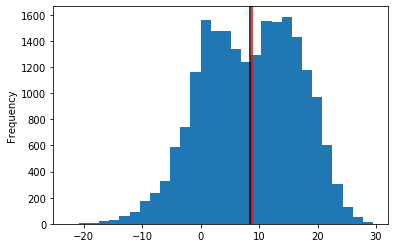

In [111]:
fig, ax = plt.subplots()
ax = ruzyne_opravena["teplota průměrná"].plot.hist(bins=30, ax=ax)
ax.axvline(ruzyne_opravena["teplota průměrná"].mean(), color="k")
ax.axvline(ruzyne_opravena["teplota průměrná"].median(), color="r")

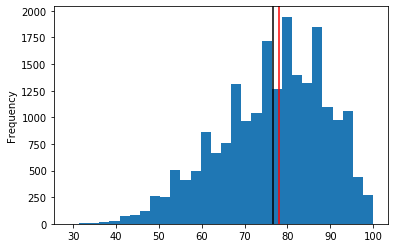

In [114]:
fig, ax = plt.subplots()
column = "vlhkost vzduchu"
ax = ruzyne_opravena[column].plot.hist(bins=30, ax=ax)
ax.axvline(ruzyne_opravena[column].mean(), color="k")
ax.axvline(ruzyne_opravena[column].median(), color="r")

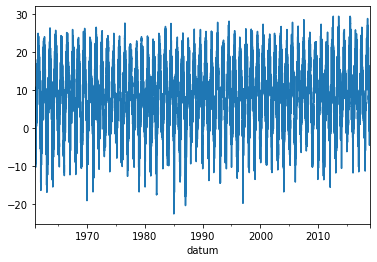

In [99]:
ruzyne_opravena["teplota průměrná"].plot()